In [1]:
from preprocess import *

corpus = load_corpus('preprocessed2')

docs = corpus2docs(corpus)

dictionary = gensim.corpora.Dictionary(docs)

vecs = docs2vecs(docs, dictionary)
print(len(docs))

100


In [2]:
print(vecs)

[[(0, 0.03918675354015673), (1, 0.08511284847741812), (2, 0.07230208827336498), (3, 0.01888217901100161), (4, 0.08511284847741812), (5, 0.08511284847741812), (6, 0.017402828069603506), (7, 0.04255642423870906), (8, 0.07230208827336498), (9, 0.064808273948263), (10, 0.029745664034655922), (11, 0.030693667738492653), (12, 0.051997513744209856), (14, 0.04419694213632156), (15, 0.07267547511843349), (16, 0.0068580064610390705), (17, 0.0019472751803988168), (18, 0.033869807661205585), (19, 0.0019472751803988168), (20, 0.02287841887299138), (21, 0.08511284847741812), (22, 0.010787424074615495), (23, 0.036337737559216744), (24, 0.08511284847741812), (25, 0.012085882190652361), (26, 0.0201353173378765), (27, 0.0015089458559946727), (28, 0.03274934217518233), (29, 0.006636025926857097), (30, 0.016478534465511688), (31, 0.07230208827336498), (32, 0.07230208827336498), (33, 0.013954342666469055), (34, 0.012085882190652361), (35, 0.03214865145333145), (36, 0.04914849776326988), (37, 0.012444767646

<h2>sum of the squared Euclidean distances between each point and the centroid in a cluster


In [9]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

folder_path = 'preprocessed2'  # Replace with path to your folder
sentences = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        # Read the text file and store the text in the sentences list
        with open(os.path.join(folder_path, filename), 'r') as f:
#             print(filename)
            document = f.readlines()
            for sentence in document:
                sentences.append(sentence)
                
# Convert the text to a vector representation using TF-IDF
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(sentences)
x

<8604x28154 sparse matrix of type '<class 'numpy.float64'>'
	with 197024 stored elements in Compressed Sparse Row format>

/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


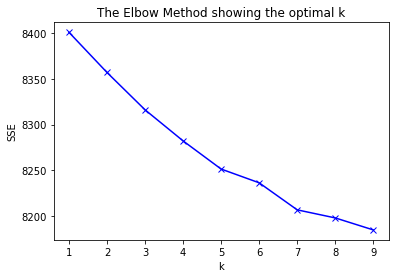

In [10]:
SSE = []
K = range(1,10)    
# Create a KMeans object with desired number of clusters
for k in K:
    model_i = KMeans(n_clusters=k, random_state=99)
    model_i.fit(x)
    SSE.append(model_i.inertia_)

# Plot the elbow
import matplotlib.pyplot as plt
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [80]:
!pip install --force-reinstall -v "numpy==1.21.4"

Using pip 22.3.1 from /Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/pip (python 3.9)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 13.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Removing file or directory /Users/eileengoh/opt/anaconda3/bin/f2py
      Removing file or directory /Users/eileengoh/opt/anaconda3/bin/f2py3
      Removing file or directory /Users/eileengoh/opt/anaconda3/bin/f2py3.9
      Removing file or directory /Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/numpy-1.22.4.dist-info/
      Removing file or directory /Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/numpy/
      Successfully uninstalled numpy-1.22.4
  changing mode of /Users/eileengoh/opt/anaconda3/bin/f2py to 755
  changing mode of /Users/eileengoh/opt/anaconda3/bin/f2py3 to 755
  changing mode of /Users/eileengoh/opt/anaconda3/bin/f2py3.9 to 755
ERROR: pip's depende

<h1>if K = 4

In [11]:
import k_means

num_tokens = len(dictionary.token2id)

# k=4
clusters = k_means.k_means(vecs, num_tokens, 4)


In [28]:
fids = corpus.fileids()

#The below prints the file ids in each cluster

cluster1 = clusters[0]
print("Cluster 1:", [fids[d] for d in cluster1])

cluster2 = clusters[1]
print("Cluster 2:", [fids[d] for d in cluster2])

cluster3 = clusters[2]
print("Cluster 3:", [fids[d] for d in cluster3])

cluster4 = clusters[3]
print("Cluster 4:", [fids[d] for d in cluster4])

Cluster 1: ['dataframe_0_preprocessed.txt', 'dataframe_100_preprocessed.txt', 'dataframe_11_preprocessed.txt', 'dataframe_12_preprocessed.txt', 'dataframe_14_preprocessed.txt', 'dataframe_16_preprocessed.txt', 'dataframe_17_preprocessed.txt', 'dataframe_18_preprocessed.txt', 'dataframe_19_preprocessed.txt', 'dataframe_1_preprocessed.txt', 'dataframe_20_preprocessed.txt', 'dataframe_23_preprocessed.txt', 'dataframe_24_preprocessed.txt', 'dataframe_25_preprocessed.txt', 'dataframe_26_preprocessed.txt', 'dataframe_27_preprocessed.txt', 'dataframe_28_preprocessed.txt', 'dataframe_29_preprocessed.txt', 'dataframe_31_preprocessed.txt', 'dataframe_34_preprocessed.txt', 'dataframe_36_preprocessed.txt', 'dataframe_37_preprocessed.txt', 'dataframe_3_preprocessed.txt', 'dataframe_42_preprocessed.txt', 'dataframe_43_preprocessed.txt', 'dataframe_44_preprocessed.txt', 'dataframe_45_preprocessed.txt', 'dataframe_4_preprocessed.txt', 'dataframe_50_preprocessed.txt', 'dataframe_52_preprocessed.txt', '

In [29]:
import nltk
from nltk.corpus import stopwords

# Get all the file IDs in cluster1
cluster1_file_ids = [fids[d] for d in cluster1]

# Create an empty list for cluster1 words
clust1_words = []

# Loop through the file IDs in cluster1 and add the words to clust1_words
for fileid in cluster1_file_ids:
    clust1_words.extend(corpus.words(fileid))

# Remove symbols from the words
clust1_words = [re.sub(r'[^\w\s]', '', word).strip() for word in clust1_words]

# Remove stopwords from the list
stop_list = nltk.corpus.stopwords.words('english')

clust1_words1 = [w.lower() for w in clust1_words]
clust1_words2 = [w for w in clust1_words1 if w not in stop_list and len(w)>4]


# Get the frequency distribution of the words and display the top 10 words

fdist = nltk.FreqDist(clust1_words2)
print(fdist.most_common(20))


[('chatgpt', 7416), ('https', 5027), ('openai', 746), ('artificialintelligence', 302), ('google', 287), ('using', 283), ('asked', 271), ('technology', 253), ('write', 222), ('intelligence', 211), ('microsoft', 211), ('people', 208), ('chatbot', 197), ('artificial', 191), ('could', 185), ('world', 180), ('think', 176), ('future', 172), ('content', 172), ('today', 166)]


In [30]:
import nltk
from nltk.corpus import stopwords

# Get all the file IDs in cluster2
cluster2_file_ids = [fids[d] for d in cluster2]

# Create an empty list for cluster2 words
clust2_words = []

# Loop through the file IDs in cluster2 and add the words to clust2_words
for fileid in cluster2_file_ids:
    clust2_words.extend(corpus.words(fileid))

# Remove symbols from the words
# clust2_words = [re.sub(r'[^\w\s]', '', word).strip() for word in clust2_words]

# Remove stopwords from the list
stop_list = nltk.corpus.stopwords.words('english')

clust2_words1 = [w.lower() for w in clust2_words]
clust2_words2 = [w for w in clust2_words1 if w not in stop_list and len(w)>4]


# Get the frequency distribution of the words and display the top 10 words

fdist = nltk.FreqDist(clust2_words2)
print(fdist.most_common(20))


[('chatgpt', 711), ('https', 576), ('openai', 84), ('artificialintelligence', 62), ('chatbot', 38), ('prompts', 35), ('chatgptprompts', 34), ('intelligence', 30), ('artificial', 28), ('aichatbot', 26), ('clients', 25), ('yyv3dwcbg4', 24), ('chatbotai', 24), ('aiprompts', 24), ('writingprompts', 24), ('ideaprompts', 24), ('creativeprompts', 24), ('content', 24), ('close', 23), ('ticket', 23)]


In [32]:

import nltk
from nltk.corpus import stopwords

# Get all the file IDs in cluster3
cluster3_file_ids = [fids[d] for d in cluster3]

# Create an empty list for cluster3 words
clust3_words = []

# Loop through the file IDs in cluster3 and add the words to clust3_words
for fileid in cluster3_file_ids:
    clust3_words.extend(corpus.words(fileid))

# Remove symbols from the words
clust3_words = [re.sub(r'[^\w\s]', '', word).strip() for word in clust3_words]

# Remove stopwords from the list
stop_list = nltk.corpus.stopwords.words('english')

clust3_words1 = [w.lower() for w in clust3_words]
clust3_words2 = [w for w in clust3_words1 if w not in stop_list and len(w)>4]


# Get the frequency distribution of the words and display the top 10 words

fdist = nltk.FreqDist(clust3_words2)
print(fdist.most_common(20))


[('chatgpt', 841), ('https', 497), ('openai', 91), ('google', 55), ('people', 52), ('could', 45), ('chatbot', 38), ('artificialintelligence', 33), ('excel', 32), ('technology', 31), ('money', 29), ('think', 28), ('microsoft', 28), ('saying', 28), ('using', 25), ('human', 25), ('business', 24), ('world', 22), ('asked', 22), ('thread', 22)]


In [33]:

import nltk
from nltk.corpus import stopwords

# Get all the file IDs in cluster4
cluster4_file_ids = [fids[d] for d in cluster4]

# Create an empty list for cluster3 words
clust4_words = []

# Loop through the file IDs in cluster4 and add the words to clust4_words
for fileid in cluster4_file_ids:
    clust4_words.extend(corpus.words(fileid))

# Remove symbols from the words
clust4_words = [re.sub(r'[^\w\s]', '', word).strip() for word in clust4_words]

# Remove stopwords from the list
stop_list = nltk.corpus.stopwords.words('english')

clust4_words1 = [w.lower() for w in clust4_words]
clust4_words2 = [w for w in clust4_words1 if w not in stop_list and len(w)>4]


# Get the frequency distribution of the words and display the top 10 words

fdist = nltk.FreqDist(clust4_words2)
print(fdist.most_common(20))


[('chatgpt', 1622), ('https', 1129), ('openai', 161), ('technology', 81), ('using', 76), ('midjourney', 66), ('artificialintelligence', 61), ('asked', 52), ('world', 51), ('language', 47), ('people', 45), ('create', 44), ('current', 44), ('crypto', 41), ('artificial', 38), ('intelligence', 38), ('learn', 38), ('think', 37), ('chatbot', 36), ('google', 35)]
